#import

In [1]:
from pandas import read_csv, datetime, DataFrame, concat, Series
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

_dataset = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


#code

In [2]:

def inverse_difference(series, yhat):
  interval = 1
  return yhat + series[-interval]


def scale(train, test):
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaler = scaler.fit(train)

  train = train.reshape(train.shape[0], train.shape[1])
  train_scaled = scaler.transform(train)

  test = test.reshape(test.shape[0], test.shape[1])
  test_scaled = scaler.transform(test)

  return scaler, train_scaled, test_scaled

def difference(dataset):
  diff = list()
  interval = 1

  for i in range(interval, len(dataset)):
    temp = dataset[i] - dataset[i - interval]
    diff.append(temp)
  return Series(diff)

def timeseries_to_supervised_frame(data, lag=1):
  df = DataFrame(data)
  
  columns = [df.shift(i) for i in range(1, lag+1)]
  columns.append(df)
  
  df = concat(columns, axis=1)
  df.fillna(0, inplace=True)
  
  return df

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

series = read_csv(_dataset, header = 0, parse_dates = [0], index_col = 0, squeeze = True, date_parser = parser)

Differenced = difference(series)

x = Differenced.values


In [3]:
supervised = timeseries_to_supervised_frame(x, 0)

train, test = supervised.values[0: 12], supervised.values[-12:]
scaler, train_scaled, test_scaled = scale(train, test)

#run

[[-0.83250961]
 [ 0.03130148]
 [-0.52333882]
 [ 0.1619989 ]
 [-0.23778144]
 [ 0.17462932]
 [-0.21306974]
 [-0.34706205]
 [-0.5568369 ]
 [ 1.        ]
 [-1.        ]
 [-0.12685338]]


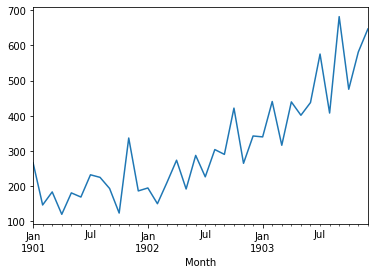

In [4]:
#print(supervised.head)
#print(supervised.diff().head())

#print(Differenced.head())

print(train_scaled)

series.plot()
plt.show()